# Liver Disease Prediction

### Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

### Loading up the data

In [3]:
df=pd.read_csv("/Users/ahmedbinnayeem/Downloads/indian_liver_patient.csv")

In [4]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [5]:
df.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [6]:
df.shape

(583, 11)

In [7]:
df.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

### Looking for missing values in the dataset

In [8]:
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

methods to deal with missing values are through dropping them or by replacing them with mean values

In [9]:
a=df["Albumin_and_Globulin_Ratio"].mean()

In [10]:
a

0.9470639032815197

In [11]:
df["Albumin_and_Globulin_Ratio"]=df["Albumin_and_Globulin_Ratio"].fillna(0.95)

In [12]:
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [13]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947084,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


### Re-naming the columns

In [14]:
df.rename(columns={'Dataset': 'Outcome'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Outcome                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [15]:
df['Gender'] = df['Gender'].map({'Male' : 1, 'Female' : 2})

### Numerical Transformation of Gender Attribute(male->1, Female->2)

In [16]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Outcome
0,65,2,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


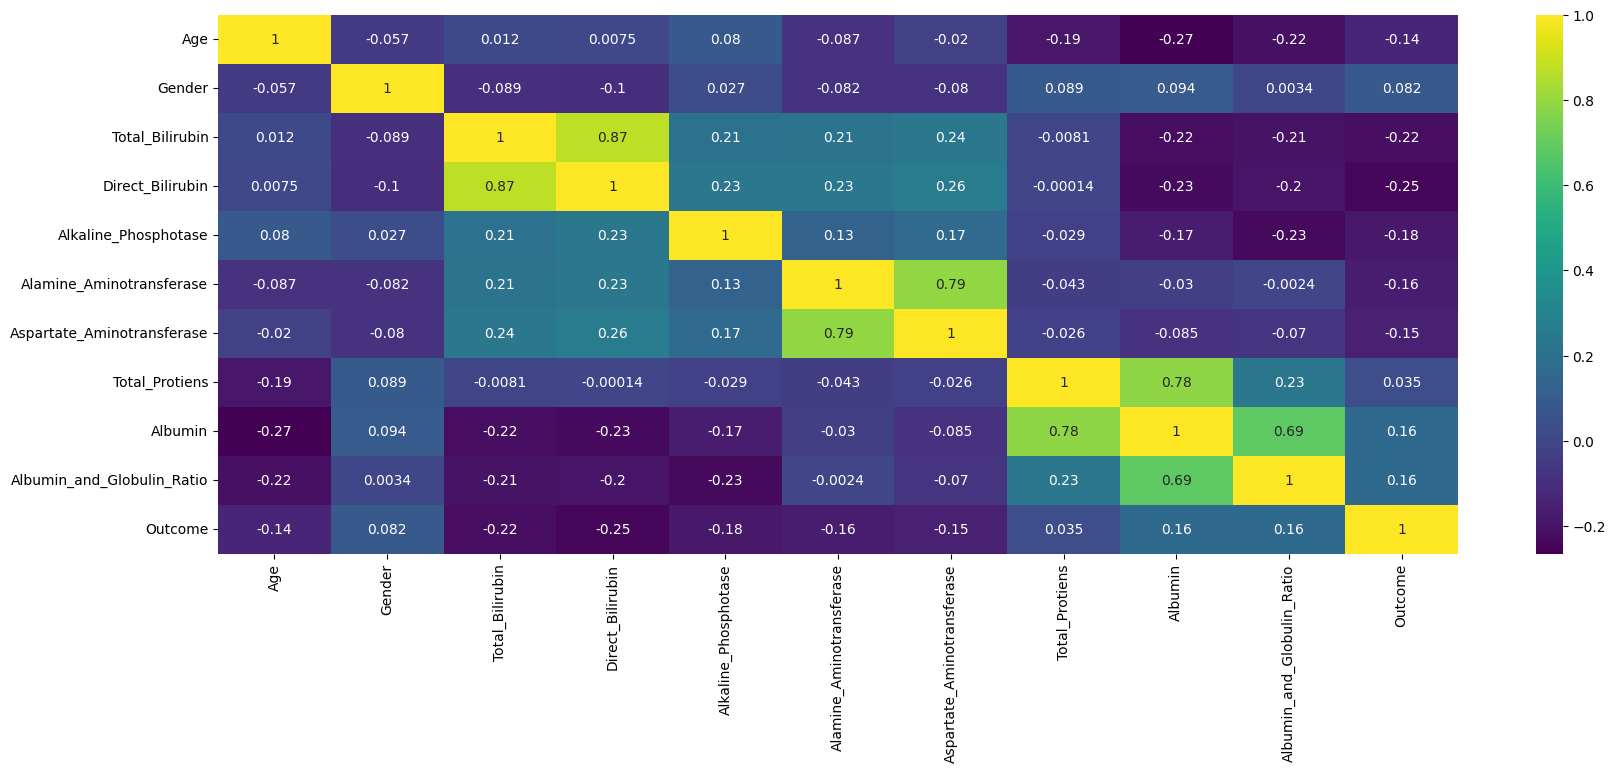

In [17]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,7))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="viridis")
#shows the total unhealthy livers and healthy livers

<Axes: xlabel='Outcome', ylabel='count'>

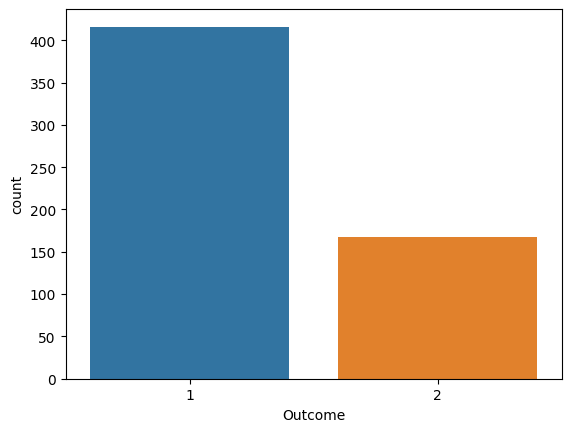

In [18]:
# Outcome countplot
sns.countplot(x = 'Outcome', data = df)

In [19]:
print ('Total Unhealthy Livers : {} '.format(df.Outcome.value_counts()[1]))
print ('Total Healthy Livers : {} '.format(df.Outcome.value_counts()[2]))

Total Unhealthy Livers : 416 
Total Healthy Livers : 167 


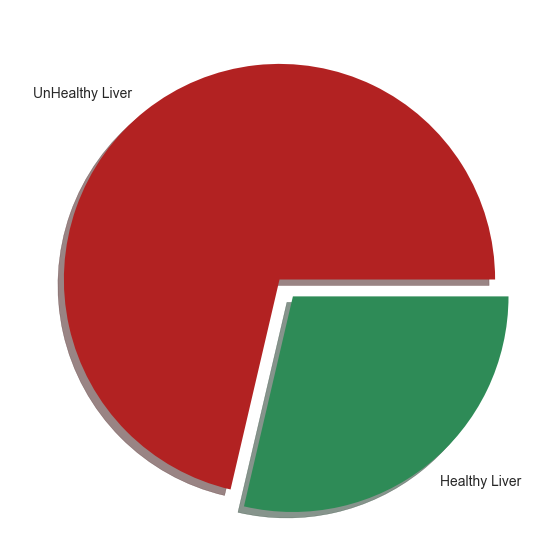

In [20]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(7,7))

plt.pie(x=df["Outcome"].value_counts(),
       colors=["firebrick", "seagreen"],
       labels=["UnHealthy Liver", "Healthy Liver"],
       shadow = True,
       explode= (0,0.1)
       )
plt.show()

In [21]:
df.Gender.value_counts()

Gender
1    441
2    142
Name: count, dtype: int64

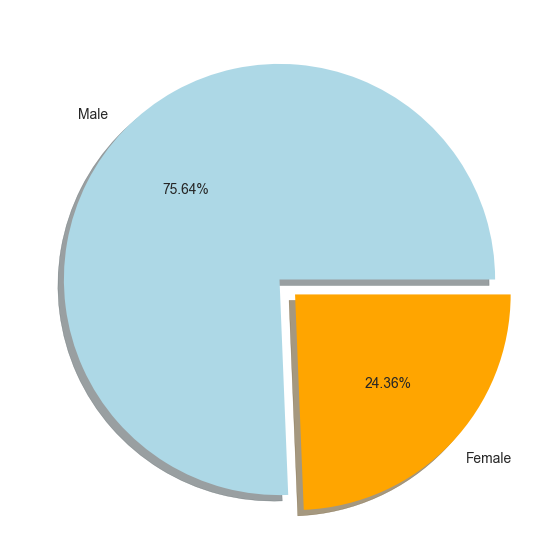

In [22]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(7,7))

plt.pie(x=df["Gender"].value_counts(),
       colors=["lightBlue", "Orange"],
       labels=["Male", "Female"],
       shadow = True,
        autopct="%1.2f%%",
       explode= (0,0.1)
       )
plt.show()

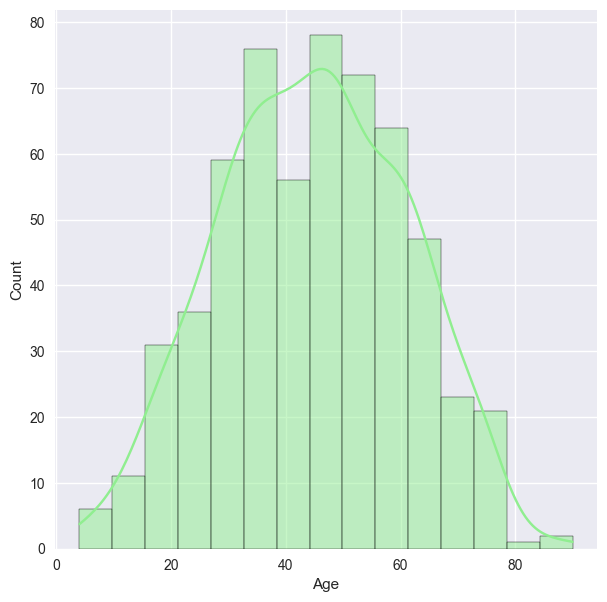

In [23]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(7,7))
sns.histplot(x=df["Age"], kde= True, color="lightgreen");

Text(0.5, 0, 'Albumin_and_Globulin_Ratio')

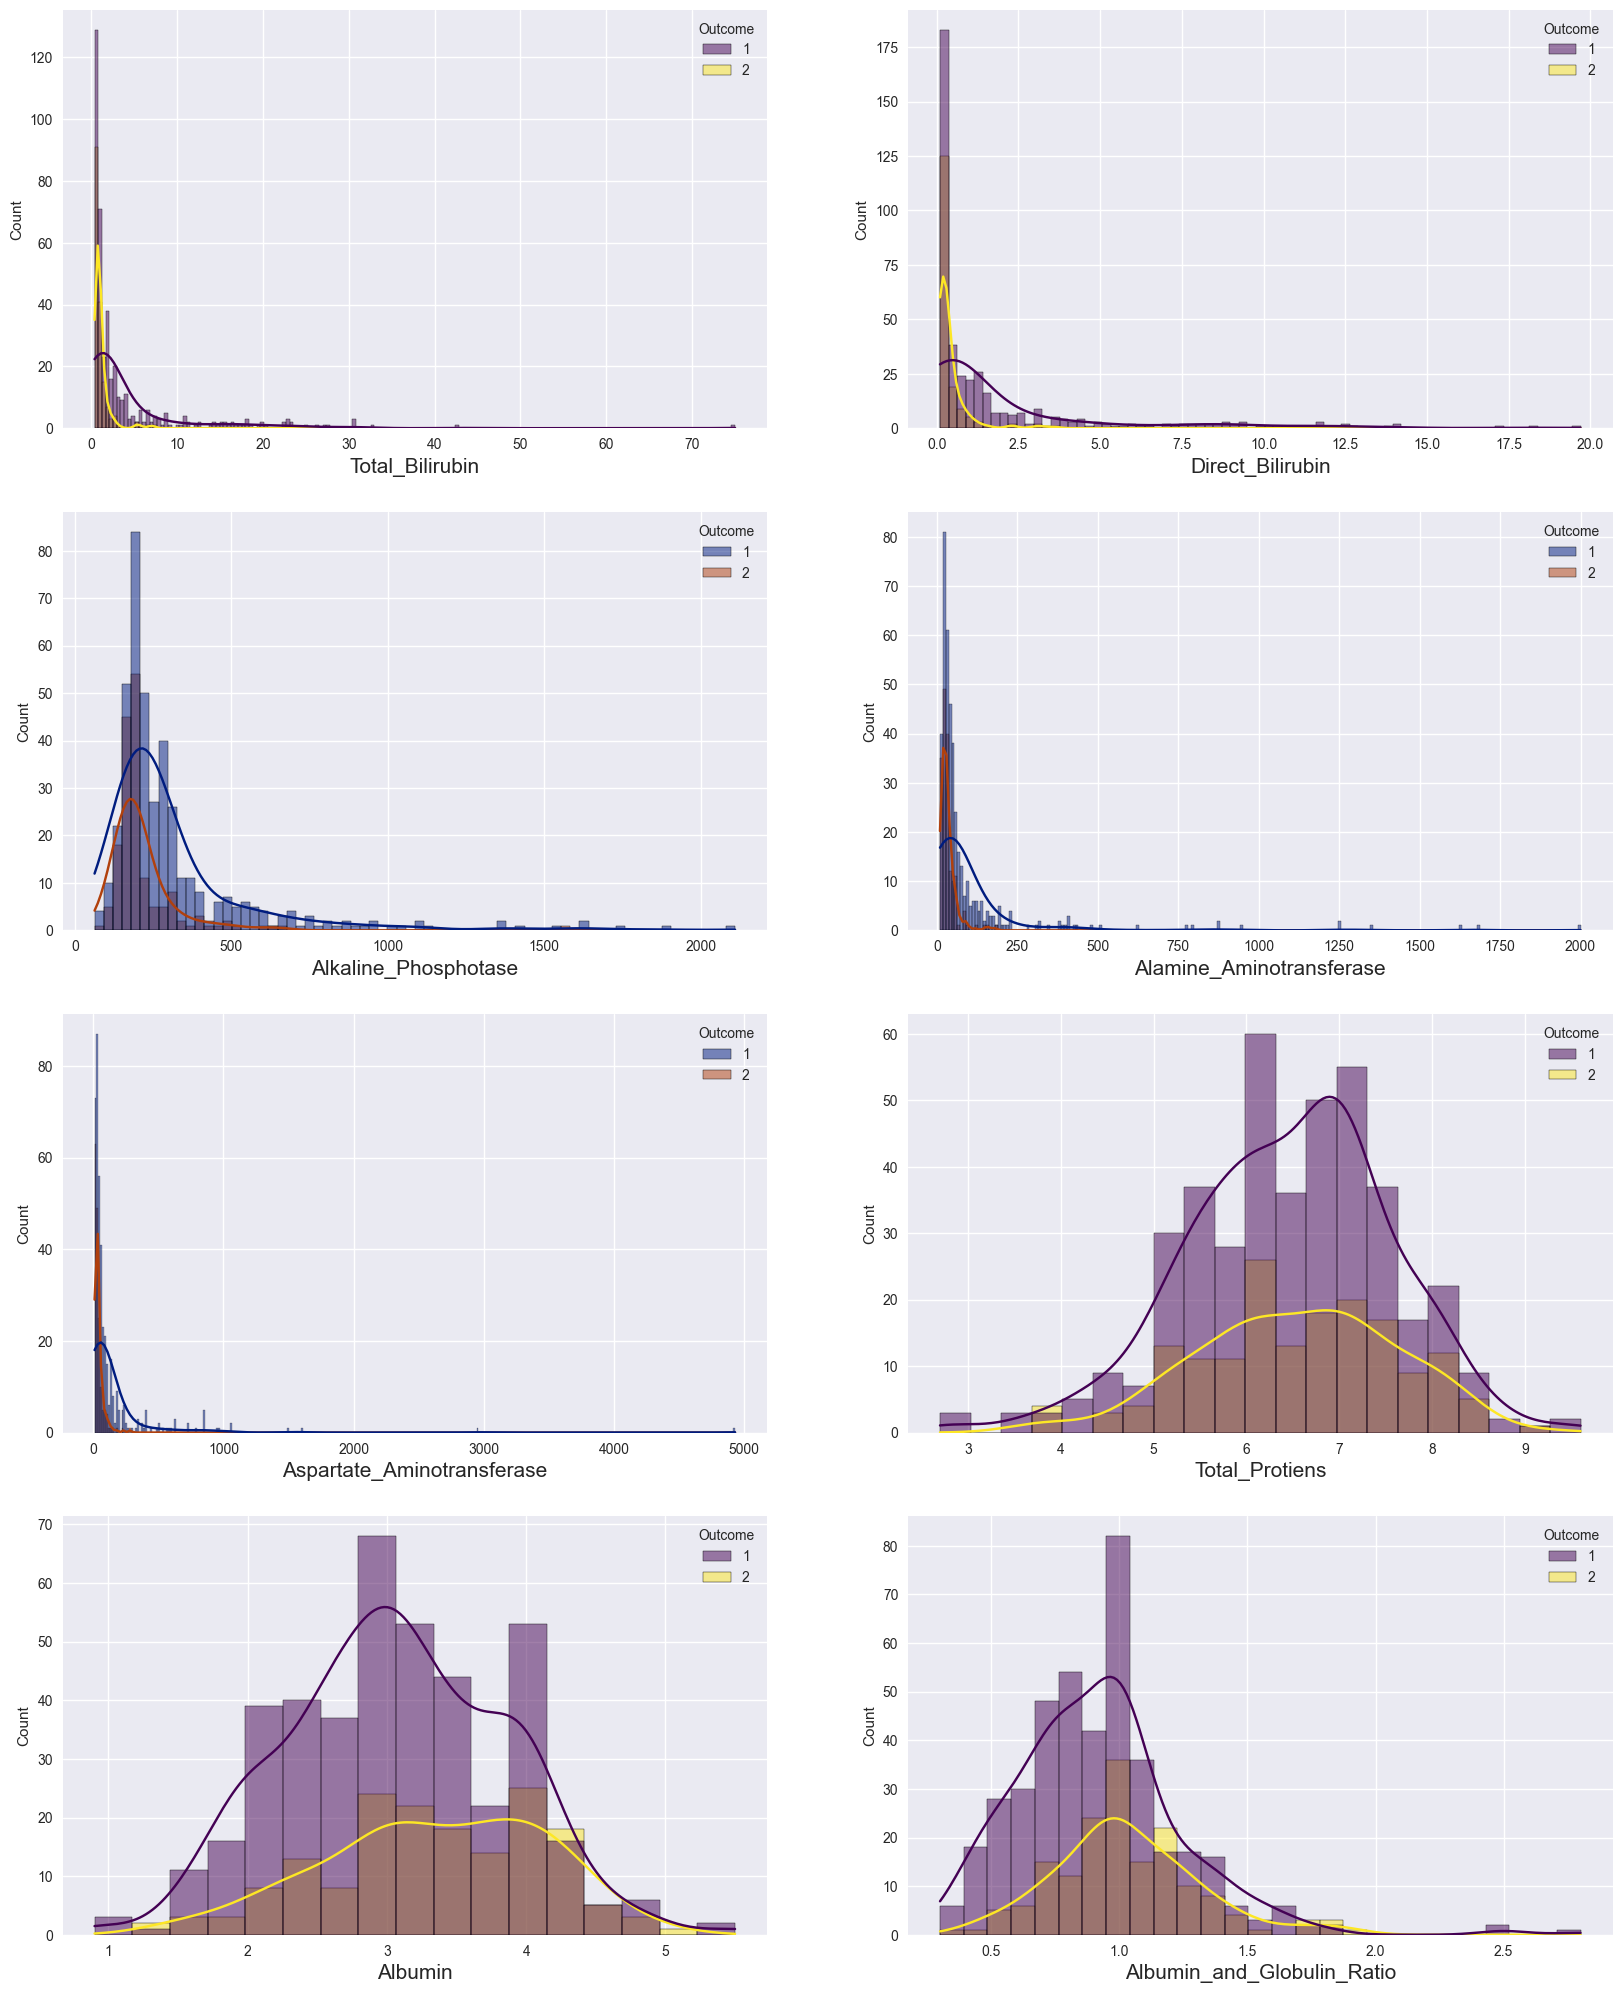

In [24]:
plt.style.use("seaborn")
fig, ax = plt.subplots(4,2, figsize=(20,25))


sns.histplot(x=df["Total_Bilirubin"], hue =df["Outcome"], kde= True, palette="viridis", ax=ax[0,0]);
ax[0,0].set_xlabel("Total_Bilirubin", fontsize=15)


sns.histplot(x=df["Direct_Bilirubin"], hue =df["Outcome"], kde= True, palette="viridis", ax=ax[0,1]);
ax[0,1].set_xlabel("Direct_Bilirubin", fontsize=15)



sns.histplot(x=df["Alkaline_Phosphotase"], hue =df["Outcome"], kde= True, palette="dark", ax=ax[1,0]);
ax[1,0].set_xlabel("Alkaline_Phosphotase", fontsize=15)


sns.histplot(x=df["Alamine_Aminotransferase"], hue =df["Outcome"], kde= True, palette="dark", ax=ax[1,1]);
ax[1,1].set_xlabel("Alamine_Aminotransferase", fontsize=15)


sns.histplot(x=df["Aspartate_Aminotransferase"], hue =df["Outcome"], kde= True, palette="dark", ax=ax[2,0]);
ax[2,0].set_xlabel("Aspartate_Aminotransferase", fontsize=15)


sns.histplot(x=df["Total_Protiens"], hue =df["Outcome"], kde= True, palette="viridis", ax=ax[2,1]);
ax[2,1].set_xlabel("Total_Protiens", fontsize=15)


sns.histplot(x=df["Albumin"], hue =df["Outcome"], kde= True, palette="viridis", ax=ax[3,0]);
ax[3,0].set_xlabel("Albumin", fontsize=15)



sns.histplot(x=df["Albumin_and_Globulin_Ratio"], hue =df["Outcome"], kde= True, palette="viridis", ax=ax[3,1]);
ax[3,1].set_xlabel("Albumin_and_Globulin_Ratio", fontsize=15)








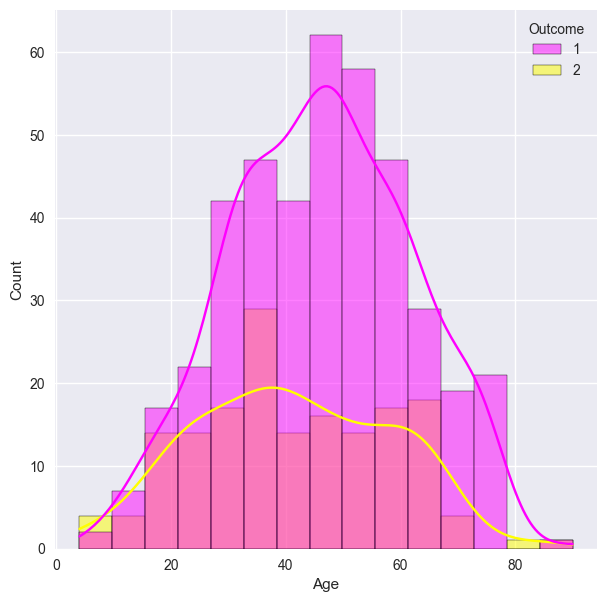

In [25]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(7,7))
sns.histplot(x=df["Age"], hue =df["Outcome"], kde= True, palette="spring");

In [26]:
df.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Outcome
0,65,2,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,2,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,2,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,1,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,1,0.7,0.2,290,53,58,6.8,3.4,1.00,1


# Splitting the data into training & test datasets

In [27]:
X = df.drop("Outcome", axis=1)
X.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,2,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40


In [28]:
y=df["Outcome"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Outcome, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [30]:
len(X_train), len(X_test)

(466, 117)

### Scaling the data

In [31]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
#SMOTE pip install imbalanced-learn

In [33]:
y.value_counts()

Outcome
1    416
2    167
Name: count, dtype: int64

In [34]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(sampling_strategy = 'minority')
X_sm,y_sm = oversample.fit_resample(X,y)


In [35]:
y_sm.value_counts()



Outcome
1    416
2    416
Name: count, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm, test_size=0.2, random_state=42, stratify=y_sm)

In [37]:
y_train.value_counts()

Outcome
2    333
1    332
Name: count, dtype: int64

In [38]:
y_test.value_counts()

Outcome
1    84
2    83
Name: count, dtype: int64

# Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [40]:
LogisticRegressionScore = lr.score(X_test, y_test)
print("Accuracy obtained by Logistic Regression Model:",LogisticRegressionScore*100)

Accuracy obtained by Logistic Regression Model: 73.05389221556887


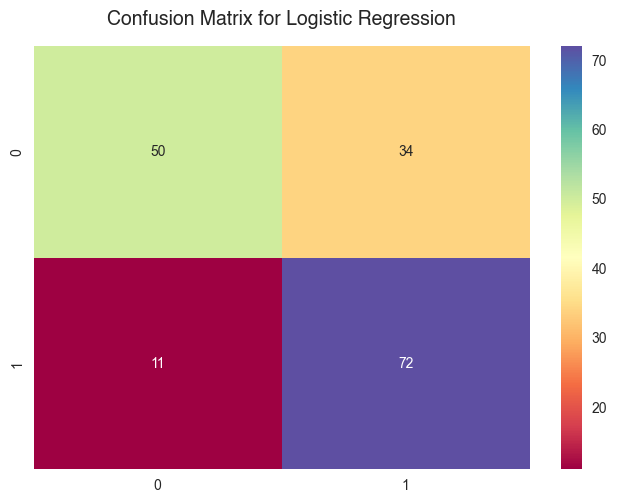

In [41]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix, classification_report

y_pred_lr = lr.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cf_matrix, annot=True, cmap="Spectral")
plt.title("Confusion Matrix for Logistic Regression", fontsize=14, fontname="Helvetica", y=1.03);

In [42]:
 # Classification report of Logistic Regression
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           1       0.82      0.60      0.69        84
           2       0.68      0.87      0.76        83

    accuracy                           0.73       167
   macro avg       0.75      0.73      0.73       167
weighted avg       0.75      0.73      0.73       167



# Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [44]:
RandomForestClassifierScore = rfc.score(X_test, y_test)
print("Accuracy obtained by Random Forest Classifier Model:",RandomForestClassifierScore*100)

Accuracy obtained by Random Forest Classifier Model: 74.8502994011976


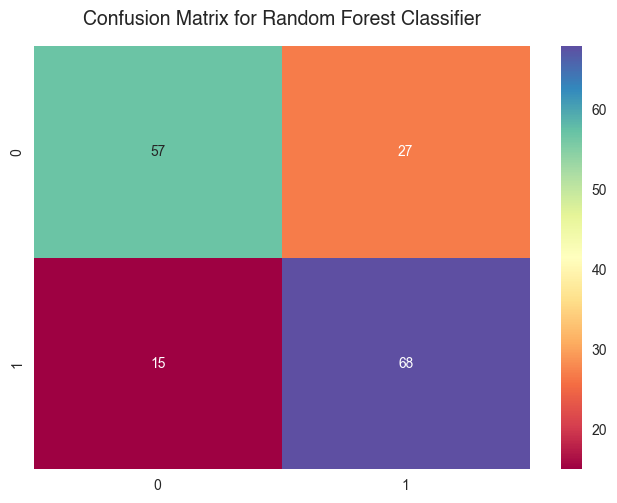

In [45]:
# Confusion Matrix

y_pred_rfc = rfc.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cf_matrix, annot=True, cmap="Spectral")
plt.title("Confusion Matrix for Random Forest Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [46]:
 # Classification report of Random Forest Classifier
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           1       0.79      0.68      0.73        84
           2       0.72      0.82      0.76        83

    accuracy                           0.75       167
   macro avg       0.75      0.75      0.75       167
weighted avg       0.75      0.75      0.75       167



# K Neighbors Classifier

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(4)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [48]:
KNeighborsClassifierScore = knn.score(X_test, y_test)
print("Accuracy obtained by K Neighbors Classifier Model:",KNeighborsClassifierScore*100)

Accuracy obtained by K Neighbors Classifier Model: 71.8562874251497


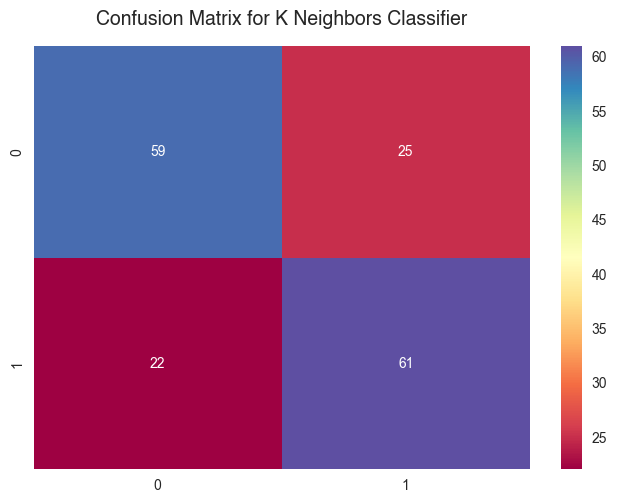

In [49]:
# Confusion Matrix

y_pred_knn = knn.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cf_matrix, annot=True, cmap="Spectral")
plt.title("Confusion Matrix for K Neighbors Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [50]:
 # Classification report of K Neighbors Classifier
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           1       0.73      0.70      0.72        84
           2       0.71      0.73      0.72        83

    accuracy                           0.72       167
   macro avg       0.72      0.72      0.72       167
weighted avg       0.72      0.72      0.72       167



# Gradient Boosting Classifier

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [52]:
GradientBoostingClassifierScore = gb.score(X_test, y_test)
print("Accuracy obtained by Gradient Boosting Classifier Model:",GradientBoostingClassifierScore*100)

Accuracy obtained by Gradient Boosting Classifier Model: 74.25149700598801


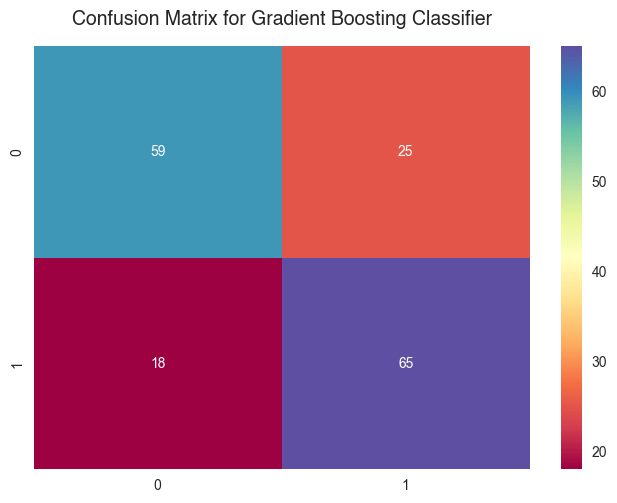

In [53]:
# Confusion Matrix

y_pred_gb = gb.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cf_matrix, annot=True, cmap="Spectral")
plt.title("Confusion Matrix for Gradient Boosting Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [54]:
 # Classification report of Gradient Boosting Classifier
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           1       0.77      0.70      0.73        84
           2       0.72      0.78      0.75        83

    accuracy                           0.74       167
   macro avg       0.74      0.74      0.74       167
weighted avg       0.74      0.74      0.74       167



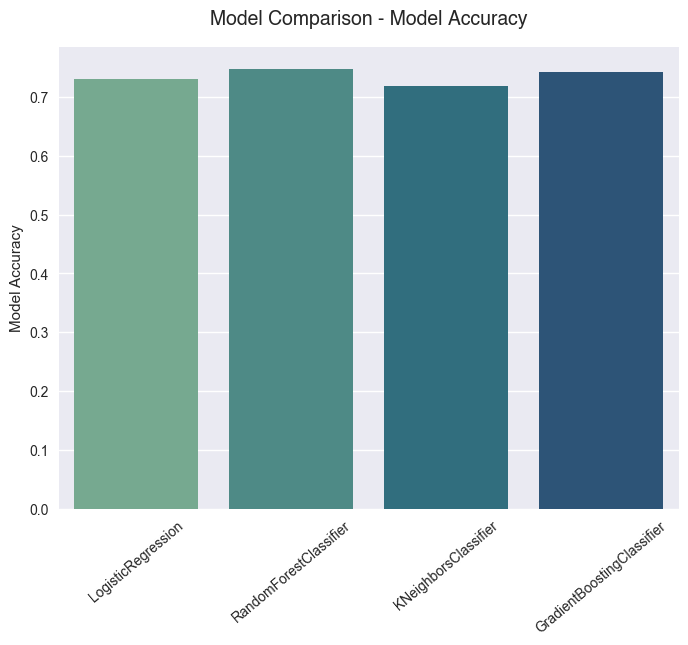

In [55]:
plt.style.use("seaborn")

x=["LogisticRegression", "RandomForestClassifier", 
   "KNeighborsClassifier","GradientBoostingClassifier"]

y=[LogisticRegressionScore,RandomForestClassifierScore,
  KNeighborsClassifierScore,GradientBoostingClassifierScore]

fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(x=x, y=y, palette="crest");
plt.ylabel("Model Accuracy")
plt.xticks(rotation=40)
plt.title("Model Comparison - Model Accuracy", fontsize=14, fontname="Helvetica", y=1.03);

# Hence random forest classifier gives the best accuracy on the dataset

# Making the system to test our model

In [56]:
input_data = (62,1,10.9,5.5,699,64,100,7.5,3.2,0.74)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rfc.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 1):
  print('According to the given details, person have Liver Disease')
else:
  print('According to the given details, person does not have Liver Disease')


[1]
According to the given details, person have Liver Disease


In [57]:
import pickle
filename = 'liver_model.sav'
pickle.dump(rfc, open(filename, 'wb'))
# loading the saved model
loaded_model = pickle.load(open('liver_model.sav', 'rb'))

In [58]:
input_data = (62,1,10.9,5.5,699,64,100,7.5,3.2,0.74)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 1):
  print('According to the given details, person have Liver Disease')
else:
  print('According to the given details, person does not have Liver Disease')

[1]
According to the given details, person have Liver Disease


In [59]:
for column in X.columns:
  print(column)

Age
Gender
Total_Bilirubin
Direct_Bilirubin
Alkaline_Phosphotase
Alamine_Aminotransferase
Aspartate_Aminotransferase
Total_Protiens
Albumin
Albumin_and_Globulin_Ratio


import matplotlib.pyplot as plt

# Classification report for algorithm 1
algo1_report = {'precision': [0.2, 0.6, 0.9],}

# Classification report for algorithm 2
algo2_report = {'precision': [0.7, 0.8, 0.6]}

# Classification report for algorithm 3
algo3_report = {'precision': [0.9, 0.8, 0.7],}

# Plot the bar graph
fig, ax = plt.subplots(figsize=(10, 6))
x = ['precision', 'recall', 'f1-score']
bar_width = 0.2
opacity = 0.8

# Set the positions of the bars on the x-axis
pos1 = list(range(len(x)))
pos2 = [x + bar_width for x in pos1]
pos3 = [x + bar_width for x in pos2]

# Plot the bars for each algorithm
ax.bar(pos1, algo1_report['precision'], bar_width, alpha=opacity, label='Algorithm 1')
ax.bar(pos2, algo2_report['precision'], bar_width, alpha=opacity, label='Algorithm 2')
ax.bar(pos3, algo3_report['precision'], bar_width, alpha=opacity, label='Algorithm 3')

# Add labels, title, and legend
ax.set_ylabel('Score')
ax.set_xlabel('Metric')
ax.set_title('Classification Report Scores by Algorithm')
ax.set_xticks([p + 1.5 * bar_width for p in pos1])
ax.set_xticklabels(x)
ax.legend()

plt.show()
